In [1]:
from pdf2image import convert_from_path, convert_from_bytes
images = convert_from_path("/home/jonasklotz/DSSGx/dssgx_land_sealing_dataset_analysis/data/testset/bp_lingen.pdf")

PDFPageCountError: Unable to get page count.
I/O Error: Couldn't open file '/home/jonasklotz/DSSGx/dssgx_land_sealing_dataset_analysis/data/testset/bp_lingen.pdf': No such file or directory.


In [26]:
sample_path ="/home/jonasklotz/DSSGx/dssgx_land_sealing_dataset_analysis/data/sample.png"
#images[0].save(sample_path)

In [3]:
import layoutparser as lp
import cv2


In [27]:
# load the image as rgb
img = cv2.imread(sample_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


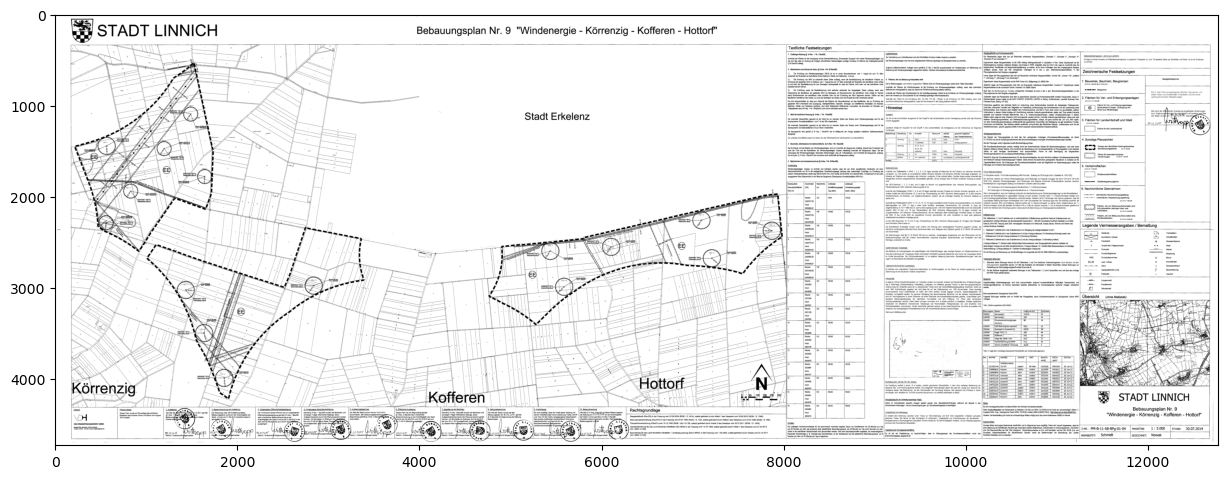

In [28]:
import matplotlib.pyplot as plt
# plot the image
plt.figure(figsize=(15, 15))
plt.imshow(img)

In [2]:
# model = lp.Detectron2LayoutModel('lp://PubLayNet/faster_rcnn_R_50_FPN_3x/config')

config.yml?dl=1: 8.19kB [00:01, 6.59kB/s]
model_final.pth?dl=1: 330MB [01:02, 5.26MB/s]                               


AssertionError: Checkpoint /home/jonasklotz/.torch/iopath_cache/s/dgy9c10wykk4lq4/model_final.pth not found!

In [29]:
# the models are saved wrong if you want to use them, you manually have to extarct it from  the directory
# with the assertion error: eg. AssertionError: Checkpoint /home/jonasklotz/.torch/iopath_cache/s/dgy9c10wykk4lq4/model_final.pth not found!
# find model final there ( has a wrong ending, remove the ending ?dl=1, put in models folder and use manually

In [36]:

#base_path = "/home/jonasklotz/DSSGx/dssgx_land_sealing_dataset_analysis/models/layout_segmentation/pretrained1"
base_path = "/home/jonasklotz/DSSGx/dssgx_land_sealing_dataset_analysis/models/layout_segmentation/publay-faster-rcnn"
model_path = f"{base_path}/model_final.pth"
config_path= f"{base_path}/config.yml"

model = lp.Detectron2LayoutModel(
            config_path =config_path, # In model catalog
            model_path=model_path,
            extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.5] # Confidence threshold
        )


In [37]:
layout = model.detect(img)

In [34]:
lp.draw_box(img, layout, box_width=5)
# Show the detected layout of the input image

In [35]:
layout


Layout(_blocks=[TextBlock(block=Rectangle(x_1=2584.444091796875, y_1=3232.05322265625, x_2=8145.255859375, y_2=4484.7470703125), text=None, id=None, type=4, parent=None, next=None, score=0.6136826872825623)], page_data={})